In [1]:
import pandas as pd
df = pd.read_csv('data/processed.csv')

In [2]:
# calculating the thresholds for trading - 90th percentile for long, 10th percentile for short
upper = df['imbalance'].quantile(0.9)
lower = df['imbalance'].quantile(0.1)

In [3]:
# creating positions
df['pos'] = 0
df.loc[df['imbalance'] >= upper, 'pos'] = 1
df.loc[df['imbalance'] <= lower, 'pos'] = -1

In [4]:
df['ret'] = df['pos']*(df['future_mid'] - df['mid'])

In [5]:
trades = df[df['pos'] != 0]

In [6]:
# average return per trade
trades['ret'].mean()

np.float64(0.22344237248120294)

In [7]:
# win rate
(trades['ret'] > 0).mean()

np.float64(0.2555586723672077)

In [8]:
len(trades)

5582628

Text(0, 0.5, 'Cumulative Return')

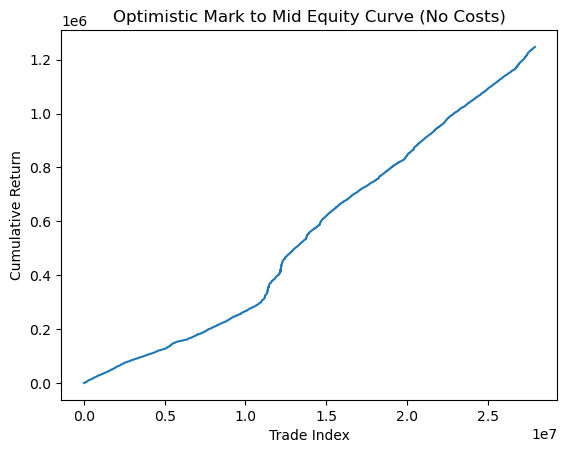

In [9]:
import matplotlib.pyplot as plt
# PnL plot
trades['ret'].cumsum().plot()
plt.title('Optimistic Mark to Mid Equity Curve (No Costs)')
plt.xlabel('Trade Index')
plt.ylabel('Cumulative Return')

In [10]:
trades['ret'].describe()

count    5.582628e+06
mean     2.234424e-01
std      9.987529e-01
min     -5.449000e+02
25%     -0.000000e+00
50%      0.000000e+00
75%      5.000000e-02
max      4.950500e+02
Name: ret, dtype: float64